In [137]:
import warnings
warnings.filterwarnings("ignore")

# 1
Load the data file and explore the data, showing size, data descriptions, data distributions with boxplot, pairplots.

The dataset has 2111 elements and 17 attributes


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
count,2111.00000,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111
unique,NaN,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5
top,NaN,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation
freq,NaN,1068,NaN,NaN,NaN,1726,1866,NaN,NaN,1765,2067,NaN,2015,NaN,NaN,1401,1580
mean,1055.00000,NaN,24.312600,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN
std,609.53753,NaN,6.345968,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN
min,0.00000,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN
25%,527.50000,NaN,19.947192,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN
50%,1055.00000,NaN,22.777890,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN
75%,1582.50000,NaN,26.000000,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN


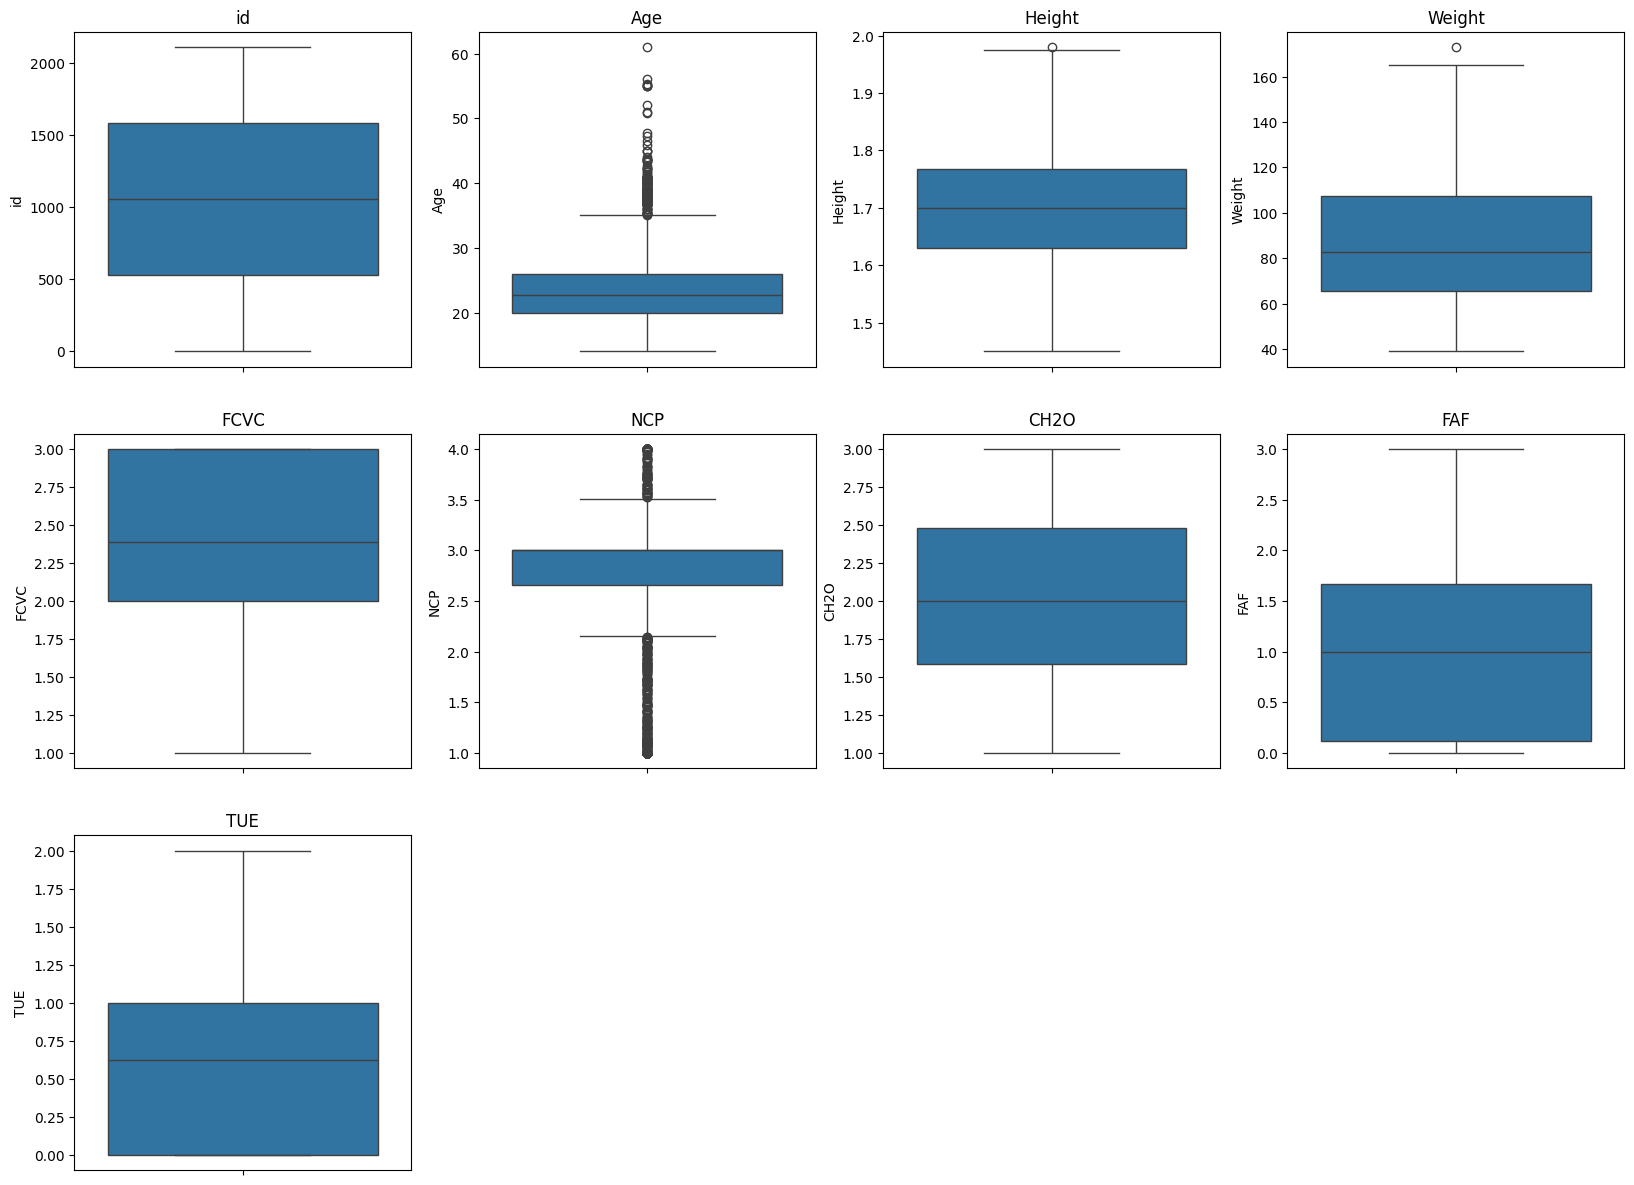

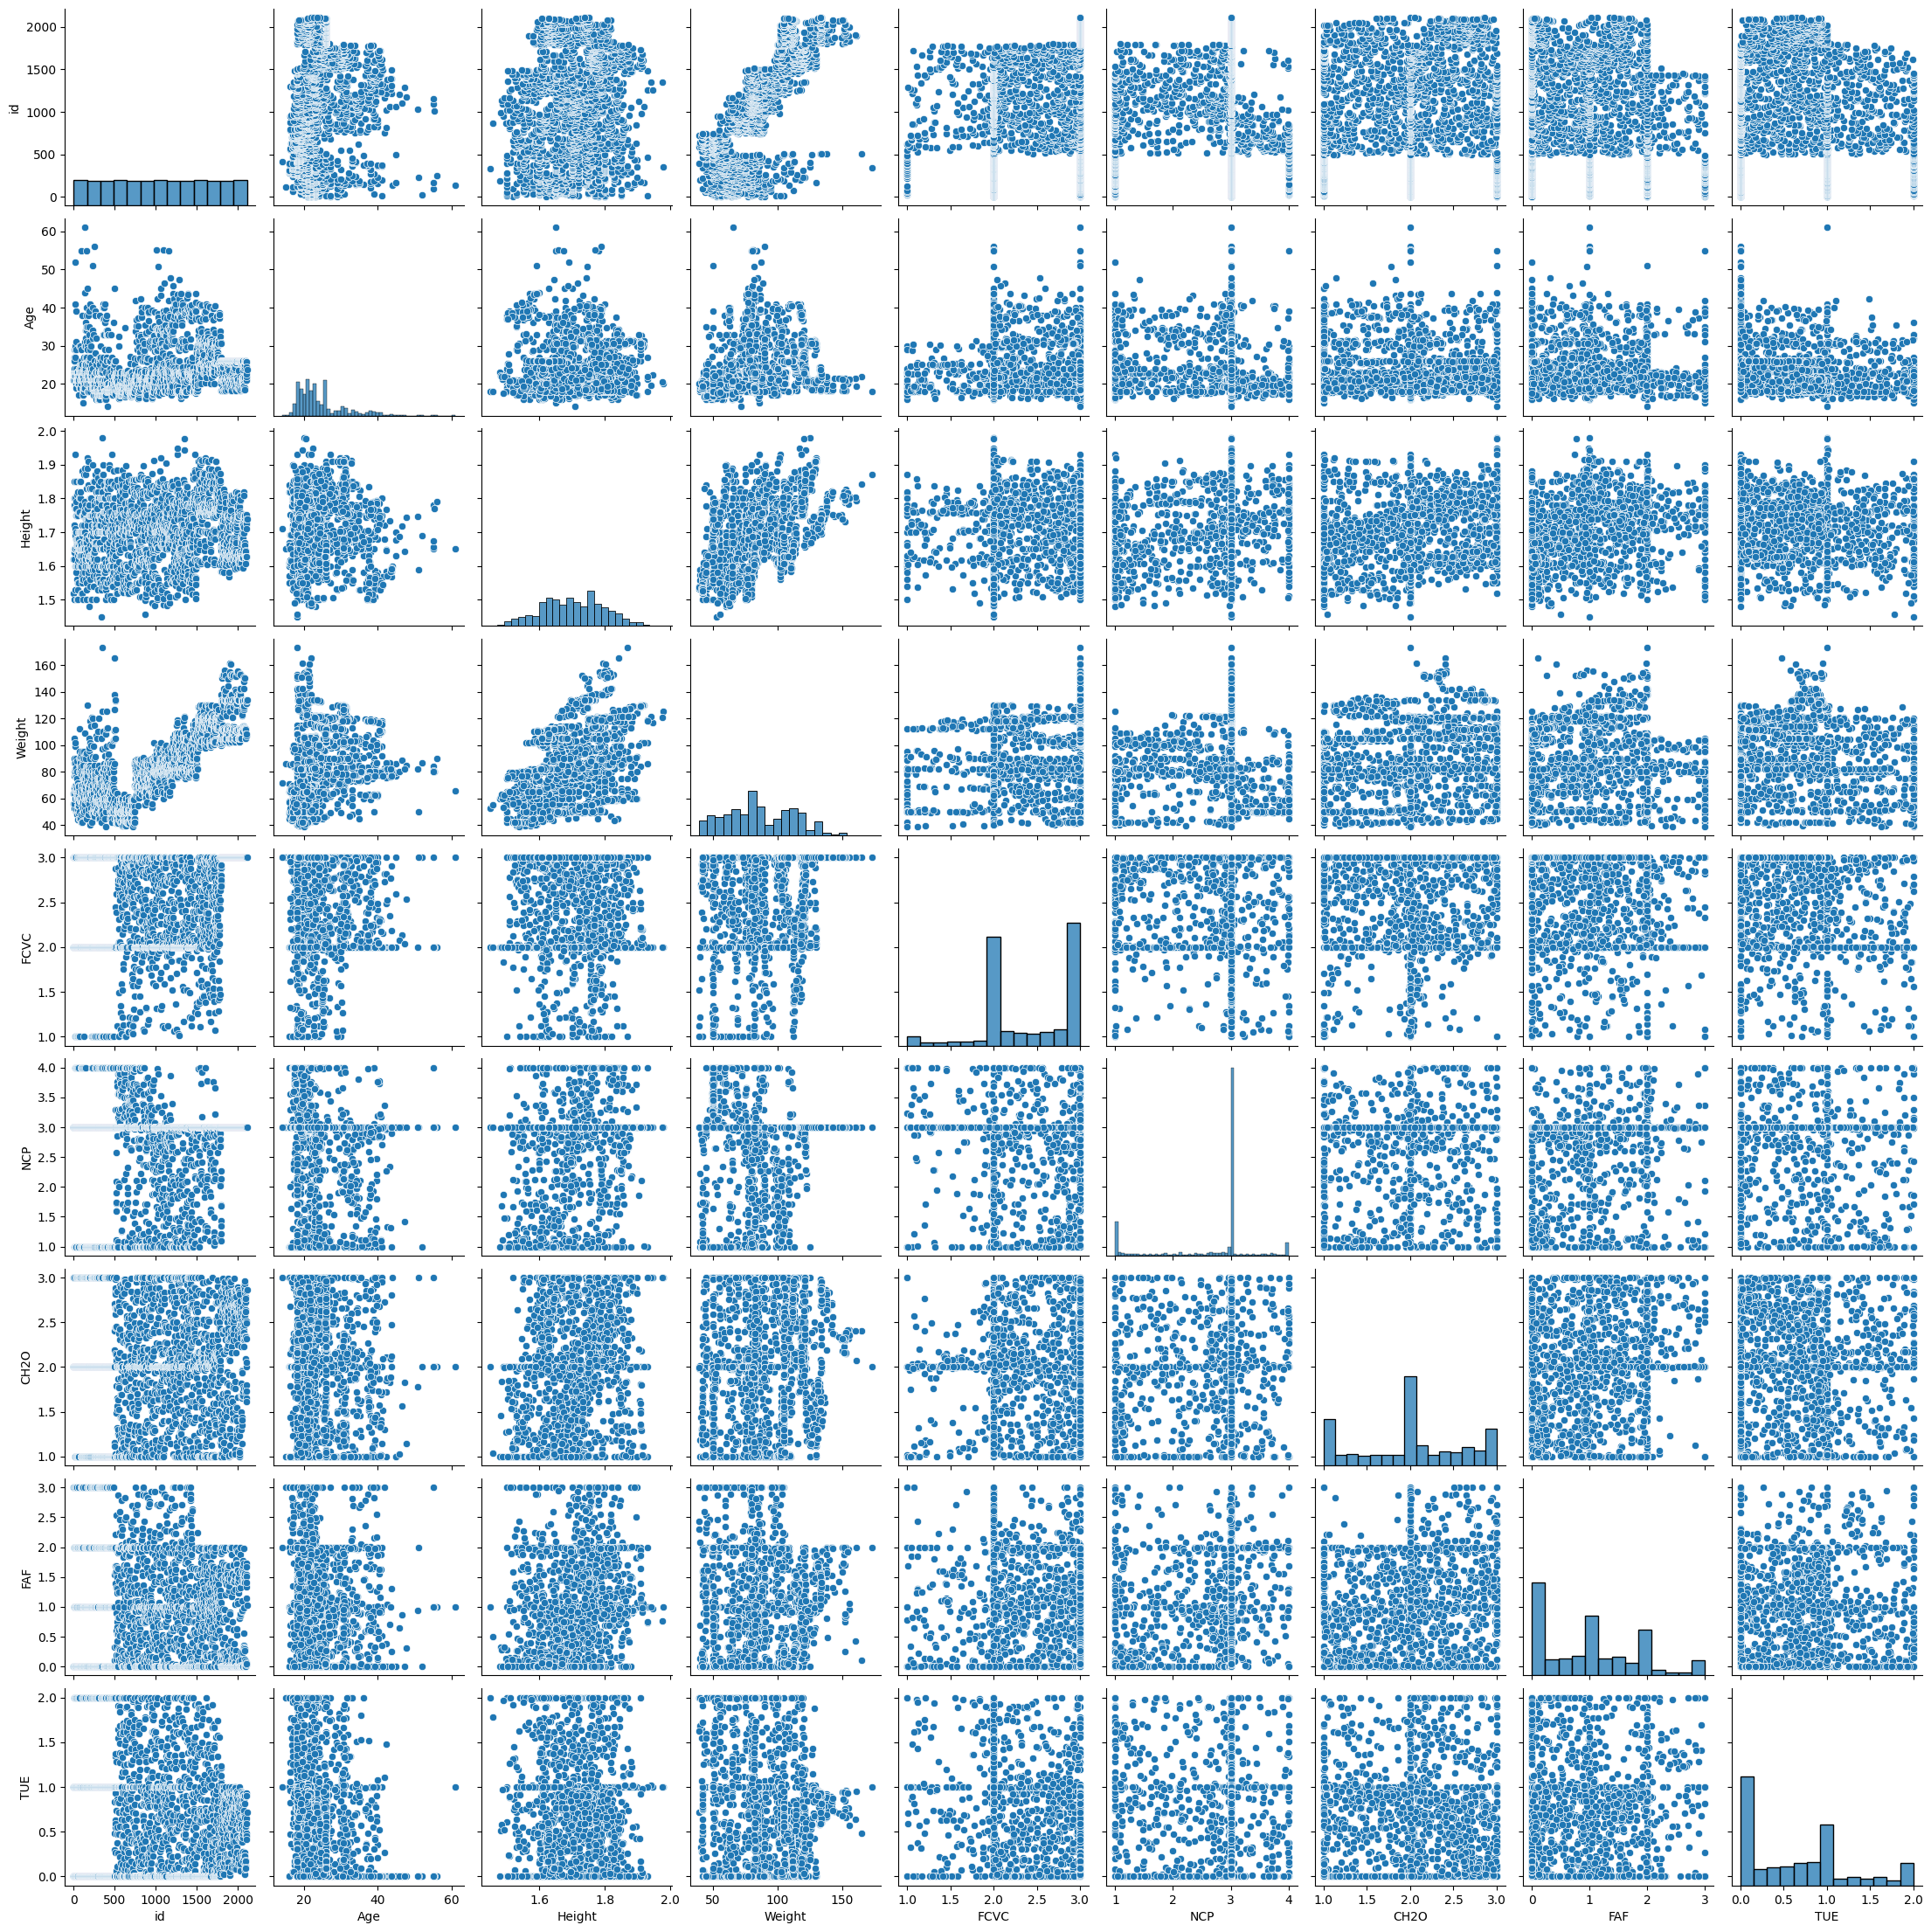

In [138]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

# Load the data
df = pd.read_csv('./dataset.csv', sep='\t')

## Explore the data ##
# Size
print(f"The dataset has {df.shape[0]} elements and {df.shape[1]} attributes")

# Data descriptions
display(df.describe(include='all'))

## Data distributions ##
# Boxplot
plt.figure(figsize=(20, 20))
i = 1

for c in df.columns:
    if type(df[c][0]) != str:
        plt.subplot(4, 4, i).set_title(c)
        sns.boxplot(df[c])
        i += 1

# Pairplot
sns.pairplot(df)

# 2
Comment the exploration of step 1 pointing out if there are imbalanced distributions, outliers, missing values, features that seem not to be relevant for clustering.

1) From the _boxplots_, we can notice a large number of outliers in the attributes AGE and NCP, the distributions are quite balanced because the median is close to the center of the distribution.
2) From the _pairplot_ we can notice 3 or 4 clusters in the attributes FCVC, NCP, CH2O, FAF, TUE

In [139]:
df.isnull().sum().sum()

0

3) So there are not missing values

# 3
- Drop the columns that are not relevant for the clustering operation, if any, and explain why you do that.
- Deal with missing values, if any.
- Transform the fields with type "object" and only two distinct values into ‘0/1‘ with OrdinalEncoder
- Transform the other "object" fields with OneHotEncoder
- Transform the numeric fields with MinMaxScaler

In [140]:
# I would drop the ids because it has only a database utility 
# and doesn't describe data
df = df.drop(['id'], axis=1)

# We have seen before there weren't missing values so we don't have to deal with them

# It will found and encode them
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
oe = OrdinalEncoder()
ohe = OneHotEncoder(sparse_output=False)
mms = MinMaxScaler()

attributes = df.columns # In order to preserve the iteration over df

for attribute in attributes :

    if (df[attribute].dtype==object) & (df[attribute].nunique()==2) :
        # Substitue the old encoded version with the new one
        df[attribute] = oe.fit_transform(df[attribute].values.reshape(-1, 1))

    elif (df[attribute].dtype==object) & (df[attribute].nunique()!=2) :
        # I produced a matrix of 0/1 that 
        encoding_values = ohe.fit_transform(df[attribute].values.reshape(-1, 1))

        # Remove the uncoded label
        df.drop(attribute, axis=1, inplace=True)    

        # Add encoded labels for each  attribute
        for i in range(encoding_values.shape[1]) :
            # I add columns that binary encode the label, 
            df[str(attribute) + '_' + str(i)] = encoding_values[:, i]
    
    else:
        # We trasform the numeric values with MinMaxScaler
        df[attribute] = pd.DataFrame(mms.fit_transform(df[attribute].values.reshape(-1, 1)))


## VERSIONE DI DAVIDE #############
# ordinal_enc = OrdinalEncoder()
# one_hot_enc = OneHotEncoder(sparse_output=False)

# columns = df.columns

# for c in columns:
#     if df[c].dtype == object:
#         # If are present only two values in a column we do the Ordinal Encoding
#         if len(np.unique(df[c])) == 2:
#             df[c] = ordinal_enc.fit_transform(np.reshape(df[c],(-1, 1)))
            
#         # If are present more than two values in a column we do the One Hot encoding
#         else:
#             encoded = one_hot_enc.fit_transform(np.reshape(df[c],(-1, 1)))
            
#             # Drop the categorical values
#             df.drop(c, axis=1, inplace=True)

#             # Insert a new column for each possible value of the previous attribute
#             for i in range(encoded.shape[1]):
#                 df[c+str(i)] = encoded[:, i]


# # Transforming numeric fields with Min-Max-Scaler
# scaler = MinMaxScaler()
# df = pd.DataFrame(scaler.fit_transform(df))


# 4
find the best clustering scheme with KMeans, show the silhouette plots of clusters, show the distribution of the resulting cluster labels (e.g. histogram or pie plot).

In [141]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

random_state = 43
k_range = list(range(2,16)) # set the range of k values to test 
parameters_km = [{'n_clusters': k_range}]
pg = list(ParameterGrid(parameters_km))
inertias_km = []
silhouette_scores_km = []

for i in range(len(pg)):
    km = KMeans(**(pg[i]), random_state=random_state)
    y_km = km.fit_predict(df)
    inertias_km.append(km.inertia_) # Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
    silhouette_scores_km.append(silhouette_score(df,y_km))

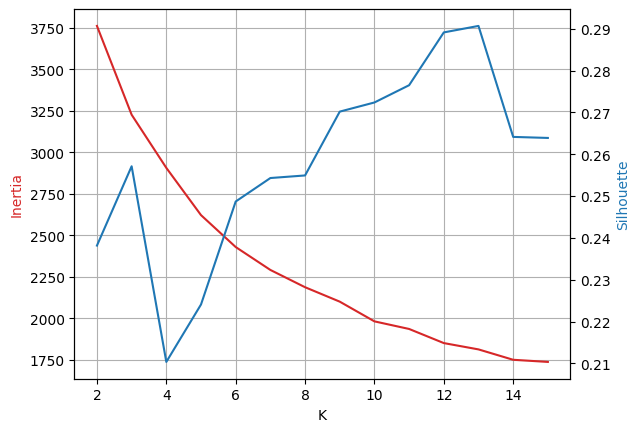

In [142]:
fig, ax1 = plt.subplots()
plt.grid()

color = 'tab:red'
ax1.set_xlabel('K')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(k_range, inertias_km, color=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Silhouette', color=color)
ax2.plot(k_range, silhouette_scores_km, color=color)

We can notice that the silhouette is quite low, but we have a local maxima in K=3 and there's an elbow in the inertia in the same point.
We have seen this value even in the data exploration part and so we will continue with K=3 even if silhouette is really maximized with 13 clusters.

<Axes: ylabel='Count'>

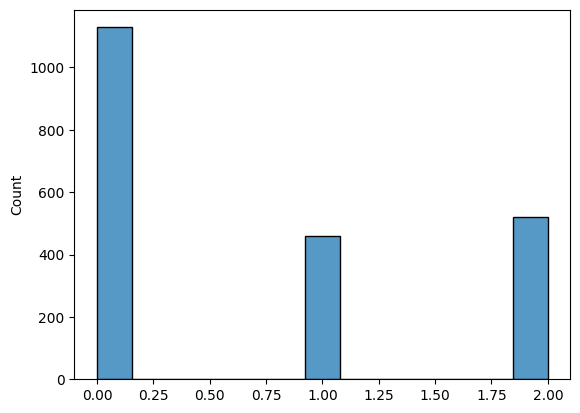

In [143]:
k=3
km = KMeans(n_clusters=k, random_state=random_state)
y_km = km.fit_predict(df)

sns.histplot(y_km)

# 5
find the best clustering scheme with Agglomerative Clustering or DBSCAN (your choice) show the silhouette plots of clusters, show the distribution of the resulting cluster labels (e.g. histogram or pie plot)

In [144]:
# I choose agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

silhouette_scores = []
inertias = []
k_range = range(2, 16)

for k in k_range:
    model = AgglomerativeClustering(k)
    y_ac = model.fit_predict(df)
    silhouette_scores.append(silhouette_score(df, y_ac))

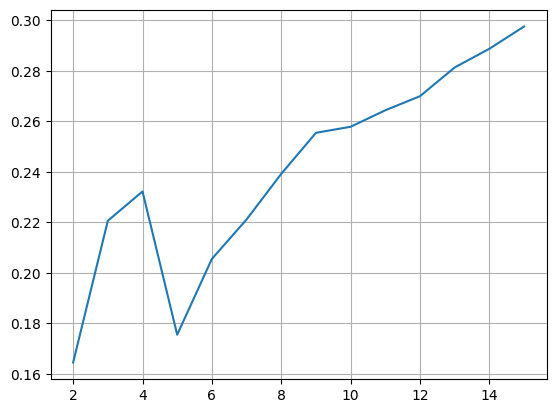

In [145]:
# Plot silhoutte
plt.plot(k_range, silhouette_scores)
plt.grid()
plt.show()

The result now seems a little different since the silholuette now doesn't have a downfall in K=4 but it's higher than K=3.

<Axes: ylabel='Count'>

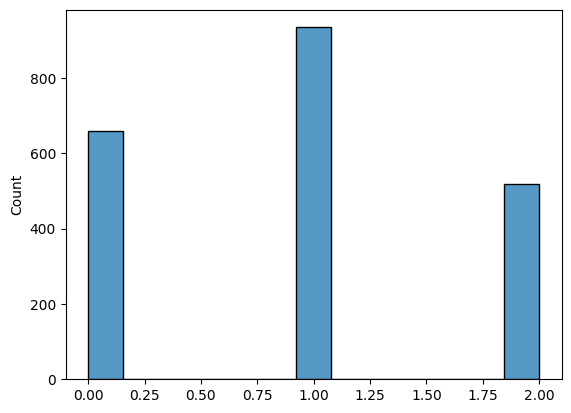

In [146]:
k = 3

ac = AgglomerativeClustering(k)

y_ac = ac.fit_predict(df)

sns.histplot(y_ac)

# 6
Compare the similarities of the two schemes with the adjusted_rand_score and comment the results.

In [147]:
from sklearn.metrics import adjusted_rand_score

similarity = adjusted_rand_score(y_km, y_ac)
print(f'The adjusted rand score betweeen the two clustering algorithm is {similarity}')

The adjusted rand score betweeen the two clustering algorithm is 0.6472178454634395


The similarity is high so the algorithms have a similar behaviour, as we have seen 